# Naive Bayes

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
data = pd.read_csv("wineQualityReds.csv")
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [4]:
X = data.iloc[:, [2, 4]].values
y = data['quality'].values

In [5]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [6]:
X

array([[0.7  , 1.9  ],
       [0.88 , 2.6  ],
       [0.76 , 2.3  ],
       ...,
       [0.51 , 2.3  ],
       [0.645, 2.   ],
       [0.31 , 3.6  ]])

# Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
X_train

array([[0.745, 1.9  ],
       [0.43 , 2.1  ],
       [0.56 , 2.   ],
       ...,
       [0.57 , 2.   ],
       [0.47 , 4.3  ],
       [0.98 , 2.3  ]])

In [9]:
y_test

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[ 1.17013908, -0.44535192],
       [-0.54734879, -0.30996223],
       [ 0.16145573, -0.37765707],
       ...,
       [ 0.21597915, -0.37765707],
       [-0.32925509,  1.17932441],
       [ 2.45143956, -0.17457253]])

In [12]:
y_test

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

# Training the Naive Bayes model on the Training set

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred

array([6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5,

In [16]:
y_test

array([6, 5, 7, 6, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 6, 6, 7, 5, 5, 4, 7, 6,
       6, 4, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 4, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 8, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 4, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 8, 5, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 4, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 3, 6, 5, 5, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 5, 6, 5, 6,
       5, 4, 5, 5, 6, 7, 6, 5, 5, 4, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6,

# Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   2   0   0   0]
 [  0   0  12   2   0   0]
 [  0   0 112  57   0   0]
 [  0   0  75  95   0   0]
 [  0   0  12  28   0   0]
 [  0   0   2   3   0   0]]


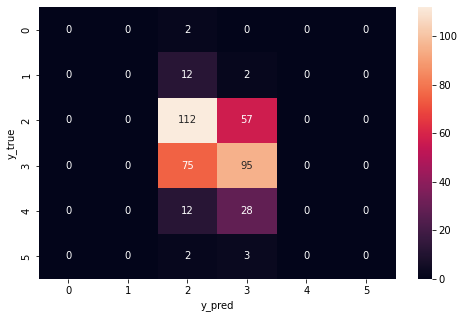

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [19]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.52      0.66      0.58       169
           6       0.51      0.56      0.54       170
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         5

    accuracy                           0.52       400
   macro avg       0.17      0.20      0.19       400
weighted avg       0.44      0.52      0.47       400



c:\Users\Naufal_Rz19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Naufal_Rz19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Naufal_Rz19\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

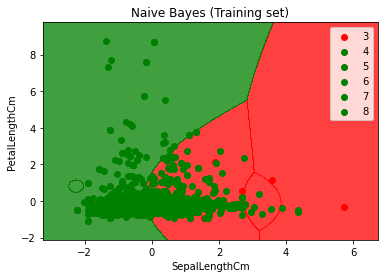

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

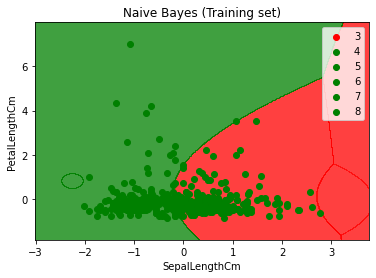

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()